# Short Assignment 1

This is an individual assignment.

**Due: Thursday, September 8 @ 11:59pm**

---
## Objectives

* Train a polynomial linear regression model
* Train an exponential regression model
* Utilize the train model/s to make predictions
* Evaluate model performance
* Make predictions and discuss results

---

# Question 1

In this assignment, you will be working with the "beer foam" dataset. 

* The [beer foam dataset](http://www.stat.ufl.edu/~winner/datasets.html) was collected by A. Leike and published in their work titled "Demonstration of the Exponential Decay Law Using Beer Froth" in 2002.

## Data Set Description

The data contains measurements of wet foam height and beer height at various time points for 3 brands of beer. The author of this data set fit an *exponential decay model* of the form $H(t) = H_0 e^{-\lambda t}$.

The data set is saved as a *.csv* file (**"beer_foam.csv"**) with information about the foam height (in cm) from 3 brands of beer over 15 measurement times (in seconds) after the time of pour.

The file is organized in 4 columns:
1. Time from pour (in seconds)
2. Erdinger Weissbier foam height (in cm)
3. Augustinerbrau Munchen foam height (in cm)
4. Budweiser foam height (in cm)

Answer the following questions:

1. Load the data using ```pandas```.

For the rest of this assignment, consider the first 12 samples the training set, and the last 3 samples the test set.

2. Build and train a polynomial regression model for **each** bear brand with model order $M=3$.

3. Build and train an exponential model of the form $y=e^{(w_0+w_1x)}$ for **each** bear brand.

4. Predict the foam height for **each** beer brand for $t=450~$seconds after pour using the trained polynomial regression model (from problem 2) and exponential model (from problem 3).

5. Compare both models using plots (qualitative measure) and select a measure to assess the goodness-of-fit (quantitative measure). Based on these results and prediction for $t=450~$seconds for both models, discuss which performed best on this data.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Question 1 Answer 1

In [2]:
df_x = pd.read_csv("beer_foam.csv")

In [3]:
X_train_E = np.array(df_x.iloc[:12,1])
X_train_A = np.array(df_x.iloc[:12,2])
X_train_B = np.array(df_x.iloc[:12,3])
X_test_E = np.array(df_x.iloc[12:,1])
X_test_A= np.array(df_x.iloc[12:,2])
X_test_B = np.array(df_x.iloc[12:,3])
Y_train =np.array(df_x.iloc[:12,0])
Y_test=np.array(df_x.iloc[12:,0])

## Question 1 Answer 2

In [4]:
def Pol_regression_reg(x,t,M,lam):
    X = np.array([x**m for m in range(M+1)]).T
    w = np.linalg.inv(X.T@X+lam*np.eye(M+1))@X.T@t
    y = X@w
    
    return w,y

def Pol_regression_test(x,M,w):
    X = np.array([x**m for m in range(M+1)]).T
    y = X@w
    return y

In [5]:
M1=3
lam = 0.001
w_E,y_E = Pol_regression_reg(Y_train,X_train_E,M1,lam)
w_A,y_A = Pol_regression_reg(Y_train,X_train_A,M1,lam)
w_B,y_B = Pol_regression_reg(Y_train,X_train_B,M1,lam)


In [6]:
y_test_E = Pol_regression_test(Y_test,M1,w_E)
y_test_A = Pol_regression_test(Y_test,M1,w_A)
y_test_B = Pol_regression_test(Y_test,M1,w_B)
print(y_test_E,X_test_E)
print(y_test_A,X_test_A)
print(y_test_B,X_test_B)

[7.6960945  6.57356251 5.2045728 ] [7.5 6.3 5.2]
[  1.74172568  -4.43842297 -16.14042925] [2.9 1.3 0.7]
[  2.89251969  -2.62137805 -12.7844814 ] [3.5 2.  0.9]


## Question 1 Answer 3

In [7]:
def expo_regression_reg(x,t,M,lam):
    X = np.array([x**m for m in range(M+1)]).T
    w = np.linalg.inv(X.T@X+lam*np.eye(M+1))@X.T@np.log(t)
    y = np.exp(X@w)
    
    return w,y

def expo_regression_test(x,M,w):
    X = np.array([x**m for m in range(M+1)]).T
    y = np.exp(X@w)
    return y

In [8]:
M2=1
lam = 0.01
w_e_E,y_e_E = expo_regression_reg(Y_train,X_train_E,M2,lam)
w_e_A,y_e_A = expo_regression_reg(Y_train,X_train_A,M2,lam)
w_e_B,y_e_B = expo_regression_reg(Y_train,X_train_B,M2,lam)


In [9]:
y_test_e_E = expo_regression_test(Y_test,M2,w_e_E)
y_test_e_A = expo_regression_test(Y_test,M2,w_e_A)
y_test_e_B = expo_regression_test(Y_test,M2,w_e_B)
print(y_test_e_E,X_test_E)
print(y_test_e_A,X_test_A)
print(y_test_e_B,X_test_B)

[7.2246208  5.88794528 4.79857706] [7.5 6.3 5.2]
[2.92710509 2.0298193  1.40759087] [2.9 1.3 0.7]
[3.90108964 2.89786572 2.15263593] [3.5 2.  0.9]


## Question 1 Answer 4 Prediction for t = 450

In [10]:
t = np.array([450])
Pol_test_E = Pol_regression_test(t,M1,w_E)
Pol_test_A = Pol_regression_test(t,M1,w_A)
Pol_test_B = Pol_regression_test(t,M1,w_B)
print("Pol_test_E: ",Pol_test_E)
print("Pol_test_A: ",Pol_test_A)
print("Pol_test_B: ",Pol_test_B)

Exp_test_E = expo_regression_test(t,M2,w_e_E)
Exp_test_A = expo_regression_test(t,M2,w_e_A)
Exp_test_B = expo_regression_test(t,M2,w_e_B)
print("Exp_test_E: ",Exp_test_E)
print("Exp_test_A: ",Exp_test_A)
print("Exp_test_B: ",Exp_test_B)

Pol_test_E:  [1.88922819]
Pol_test_A:  [-48.69830246]
Pol_test_B:  [-40.60903116]
Exp_test_E:  [3.53049447]
Exp_test_A:  [0.81283994]
Exp_test_B:  [1.37818994]


## Error measures for polynomial and exponential models(MSE and MAE)

In [11]:
print("Error Measure for beer E")

# Residual error for Training data for polynomial regression without and with regularizer
error_train = X_train_E - y_E 
error_train_exp = X_train_E - y_e_E

# Residual error for Test data for polynomial regression without and with regularizer
error_test = X_test_E - y_test_E
error_test_exp = X_test_E - y_test_e_E

# Error Measures
print('Mean Squared Error \n')
print('Training Set')
print('Without exponential: ', np.mean(error_train**2))
print('With exponential: ', np.mean(error_train_exp**2),'\n')
print('Test Set')
print('Without exponential: ', np.mean(error_test**2))
print('With exponential: ', np.mean(error_test_exp**2),'\n')
print('----------------------------------------------------------------')
print('Mean Absolute Error \n')
print('Training Set')
print('Without exponential: ', np.mean(np.abs(error_train)))
print('With exponential: ', np.mean(np.abs(error_train_exp)),'\n')
print('Test Set')
print('Without exponential: ', np.mean(np.abs(error_test)))
print('With exponential: ', np.mean(np.abs(error_test_exp)),'\n')

Error Measure for beer E
Mean Squared Error 

Training Set
Without exponential:  0.003499752781462291
With exponential:  0.08077639639513183 

Test Set
Without exponential:  0.0377701368496994
With exponential:  0.13558772743176337 

----------------------------------------------------------------
Mean Absolute Error 

Training Set
Without exponential:  0.04602229754713205
With exponential:  0.2233452405692901 

Test Set
Without exponential:  0.1580766042172049
With exponential:  0.3629522910906407 



In [12]:
print("Error measure for beer A")

# Residual error for Training data for polynomial regression without and with regularizer
error_train = X_train_A - y_A 
error_train_exp = X_train_A - y_e_A

# Residual error for Test data for polynomial regression without and with regularizer
error_test = X_test_A - y_test_A
error_test_exp = X_test_A - y_test_e_A

# Error Measures
print('Mean Squared Error \n')
print('Training Set')
print('Without exponential: ', np.mean(error_train**2))
print('With exponential: ', np.mean(error_train_exp**2),'\n')
print('Test Set')
print('Without exponential: ', np.mean(error_test**2))
print('With exponential: ', np.mean(error_test_exp**2),'\n')
print('----------------------------------------------------------------')
print('Mean Absolute Error \n')
print('Training Set')
print('Without exponential: ', np.mean(np.abs(error_train)))
print('With exponential: ', np.mean(np.abs(error_train_exp)),'\n')
print('Test Set')
print('Without exponential: ', np.mean(np.abs(error_test)))
print('With exponential: ', np.mean(np.abs(error_test_exp)),'\n')

Error measure for beer A
Mean Squared Error 

Training Set
Without exponential:  0.014461842463253138
With exponential:  0.19216895073401366 

Test Set
Without exponential:  105.95705159716516
With exponential:  0.34468524743238743 

----------------------------------------------------------------
Mean Absolute Error 

Training Set
Without exponential:  0.09967244457771633
With exponential:  0.2858790782772262 

Test Set
Without exponential:  7.9123755117155135
With exponential:  0.48817175408477476 



In [13]:
print("Error Measure for beer B")

# Residual error for Training data for polynomial regression without and with regularizer
error_train = X_train_B - y_B 
error_train_exp = X_train_B - y_e_B

# Residual error for Test data for polynomial regression without and with regularizer
error_test = X_test_B - y_test_B
error_test_exp = X_test_B - y_test_e_B

# Error Measures
print('Mean Squared Error \n')
print('Training Set')
print('Without exponential: ', np.mean(error_train**2))
print('With exponential: ', np.mean(error_train_exp**2),'\n')
print('Test Set')
print('Without exponential: ', np.mean(error_test**2))
print('With exponential: ', np.mean(error_test_exp**2),'\n')
print('----------------------------------------------------------------')
print('Mean Absolute Error \n')
print('Training Set')
print('Without exponential: ', np.mean(np.abs(error_train)))
print('With exponential: ', np.mean(np.abs(error_train_exp)),'\n')
print('Test Set')
print('Without exponential: ', np.mean(np.abs(error_test)))
print('With exponential: ', np.mean(np.abs(error_test_exp)),'\n')

Error Measure for beer B
Mean Squared Error 

Training Set
Without exponential:  0.014217739929502425
With exponential:  0.14773250960871184 

Test Set
Without exponential:  69.6637328297857
With exponential:  0.8453775089755396 

----------------------------------------------------------------
Mean Absolute Error 

Training Set
Without exponential:  0.09943740049742789
With exponential:  0.2507644949252477 

Test Set
Without exponential:  6.304446585487352
With exponential:  0.8505304301782179 



## Question 1 Answer 5

### Q_Q plot for qualitative measure

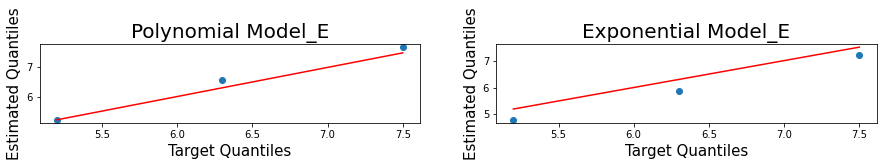

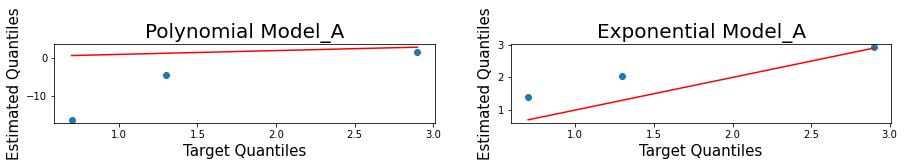

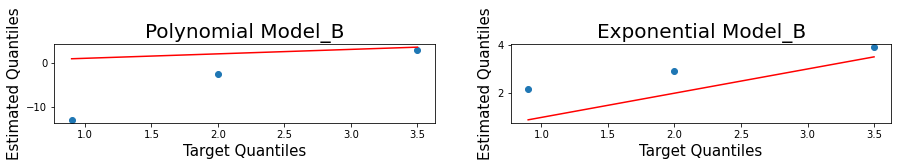

In [14]:
base_E = np.linspace(min(X_test_E),max(X_test_E),100)

plt.figure(figsize=(15,5))
plt.subplot(3,2,1); plt.scatter(np.sort(X_test_E), np.sort(y_test_E))
#NOTE: the true values and predictions are sorted because we are 
#inferring quantiles of the underlying probabilistic model from data samples
plt.plot(base_E,base_E,'r')
plt.xlabel('Target Quantiles', size=15)
plt.ylabel('Estimated Quantiles', size=15)
plt.title('Polynomial Model_E',size=20)

#base_e = np.linspace(min(np.exp(X_test_E)),np.exp(max(X_test_E)),100)
plt.subplot(3,2,2); plt.scatter(np.sort(X_test_E), np.sort(y_test_e_E))
#NOTE: the true values and predictions are sorted because we are 
#inferring quantiles of the underlying probabilistic model from data samples
plt.plot(base_E,base_E,'r')
plt.xlabel('Target Quantiles', size=15)
plt.ylabel('Estimated Quantiles', size=15)
plt.title('Exponential Model_E',size=20);


base_A = np.linspace(min(X_test_A),max(X_test_A),100)

plt.figure(figsize=(15,5))
plt.subplot(3,2,3); plt.scatter(np.sort(X_test_A), np.sort(y_test_A))
#NOTE: the true values and predictions are sorted because we are 
#inferring quantiles of the underlying probabilistic model from data samples
plt.plot(base_A,base_A,'r')
plt.xlabel('Target Quantiles', size=15)
plt.ylabel('Estimated Quantiles', size=15)
plt.title('Polynomial Model_A',size=20)

#base_e = np.linspace(min(np.exp(X_test_E)),np.exp(max(X_test_E)),100)
plt.subplot(3,2,4); plt.scatter(np.sort(X_test_A), np.sort(y_test_e_A))
#NOTE: the true values and predictions are sorted because we are 
#inferring quantiles of the underlying probabilistic model from data samples
plt.plot(base_A,base_A,'r')
plt.xlabel('Target Quantiles', size=15)
plt.ylabel('Estimated Quantiles', size=15)
plt.title('Exponential Model_A',size=20);

base_B = np.linspace(min(X_test_B),max(X_test_B),100)

plt.figure(figsize=(15,5))
plt.subplot(3,2,5); plt.scatter(np.sort(X_test_B), np.sort(y_test_B))
#NOTE: the true values and predictions are sorted because we are 
#inferring quantiles of the underlying probabilistic model from data samples
plt.plot(base_B,base_B,'r')
plt.xlabel('Target Quantiles', size=15)
plt.ylabel('Estimated Quantiles', size=15)
plt.title('Polynomial Model_B',size=20)

#base_e = np.linspace(min(np.exp(X_test_E)),np.exp(max(X_test_E)),100)
plt.subplot(3,2,6); plt.scatter(np.sort(X_test_B), np.sort(y_test_e_B))
#NOTE: the true values and predictions are sorted because we are 
#inferring quantiles of the underlying probabilistic model from data samples
plt.plot(base_B,base_B,'r')
plt.xlabel('Target Quantiles', size=15)
plt.ylabel('Estimated Quantiles', size=15)
plt.title('Exponential Model_B',size=20);

### Coefficient of determinant for quantitative measure

In [15]:
import scipy.stats as stats

print("For Beer E")
print('Polynomial Regression - Test Set')
m_e, b_e, r_e, p_e, _ = stats.linregress(np.sort(X_test_E), np.sort(y_test_E))
print('Coefficient of Determination: ',r_e**2)
print('Slope: ',m_e)
print('Intercept: ',b_e)
print('p-value: ', p_e)
print('-------------------')
print('Exponential Regression - Test Set')
m_e_e, b_e_e, r_e_e, p_e_e, _ = stats.linregress(np.sort(X_test_E), np.sort(y_test_e_E))
print('Coefficient of Determination: ',r_e_e**2)
print('Slope: ',m_e_e)
print('Intercept: ',b_e_e)
print('p-value: ', p_e_e)

print("**********************************************************")

print("For Beer A")
print('Polynomial Regression - Test Set')
m_a, b_a, r_a, p_a, _ = stats.linregress(np.sort(X_test_A), np.sort(y_test_A))
print('Coefficient of Determination: ',r_a**2)
print('Slope: ',m_a)
print('Intercept: ',b_a)
print('p-value: ', p_a)
print('-------------------')
print('Exponential Regression - Test Set')
m_e_a, b_e_a, r_e_a, p_e_a, _ = stats.linregress(np.sort(X_test_A), np.sort(y_test_e_A))
print('Coefficient of Determination: ',r_e_a**2)
print('Slope: ',m_e_a)
print('Intercept: ',b_e_a)
print('p-value: ', p_e_a)


print("**********************************************************")

print("For Beer B")
print('Polynomial Regression - Test Set')
m_b, b_b, r_b, p_b, _ = stats.linregress(np.sort(X_test_B), np.sort(y_test_B))
print('Coefficient of Determination: ',r_b**2)
print('Slope: ',m_b)
print('Intercept: ',b_b)
print('p-value: ', p_b)
print('-------------------')
print('Exponential Regression - Test Set')
m_e_b, b_e_b, r_e_b, p_e_b, _ = stats.linregress(np.sort(X_test_B), np.sort(y_test_e_B))
print('Coefficient of Determination: ',r_e_b**2)
print('Slope: ',m_e_b)
print('Intercept: ',b_e_b)
print('p-value: ', p_e_b)

print('##################################################')
print("Comparison Average values of Coefficient of determinants for both the systems")

print("Average Coefficeint of determinat for polynomial model: ", (r_e**2+r_a**2+r_b**2)/3)
print("Average Coefficeint of determinat for exponential model: ", (r_e_e**2+r_e_a**2+r_e_b**2)/3)


For Beer E
Polynomial Regression - Test Set
Coefficient of Determination:  0.9932672653462015
Slope:  1.0810361437047664
Intercept:  -0.3551523059129815
p-value:  0.05229551105042394
-------------------
Exponential Regression - Test Set
Coefficient of Determination:  0.9988654468155636
Slope:  1.0556947439807733
Intercept:  -0.7156856696355378
p-value:  0.021447402806769073
**********************************************************
For Beer A
Polynomial Regression - Test Set
Coefficient of Determination:  0.8238845666743922
Slope:  7.248734851538149
Intercept:  -18.118642435894493
p-value:  0.2757021416936631
-------------------
Exponential Regression - Test Set
Coefficient of Determination:  0.9769196694048736
Slope:  0.6639079368075924
Intercept:  1.0371221239657067
p-value:  0.09709258552225865
**********************************************************
For Beer B
Polynomial Regression - Test Set
Coefficient of Determination:  0.9348176887331263
Slope:  5.891434747147028
Intercept:  

### Here we can clealy see that based on the output for value t = 450 and that the average for Coefficient of determinant for exponential model is much closer to 1 compared to polynomila model, we can deduce that the exponential model is better then the ploynomial model.

# Question 2

Consider the noisy sinusoidal data we have been working with from lecture. 

Build a linear regression model with Gaussian basis functions as feature representations of the data. Consider the Gaussian basis functions:

\begin{align*}
\phi_j(x) = \exp\left\{-\frac{(x-\mu_j)^2)}{2\sigma^2}\right\}
\end{align*}

where $\mu=\{0.1, 0.3, 0.6, 0.9\}$ for $j=1,2,3,4$, respectively, and a fixed standard deviation $\sigma=0.1$.

1. Train this model using the training set generated below.

2. Make predictions using the test set.

3. Provide a paragraph discussion about how you would determine how many Gaussian basis functions you would need and how would you determine the mean values $\mu_j$ and the bandwidth parameter $\sigma$.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

def NoisySinusoidalData(N, a, b, sigma):
    '''Generates N data points in the range [a,b) sampled from a sin(2*pi*x) 
    with additive zero-mean Gaussian random noise with standard deviation sigma'''
    
    # N input samples, evenly spaced numbers between [a,b) incrementing by 1/N
    x = np.linspace(a,b,N)
    
    # draw N sampled from a univariate Gaussian distribution with mean 0, sigma standard deviation and N data points
    noise = np.random.normal(0,sigma,N)
    
    # desired values, noisy sinusoidal
    t = np.sin(2*np.pi*x) + noise
    
    return x, t

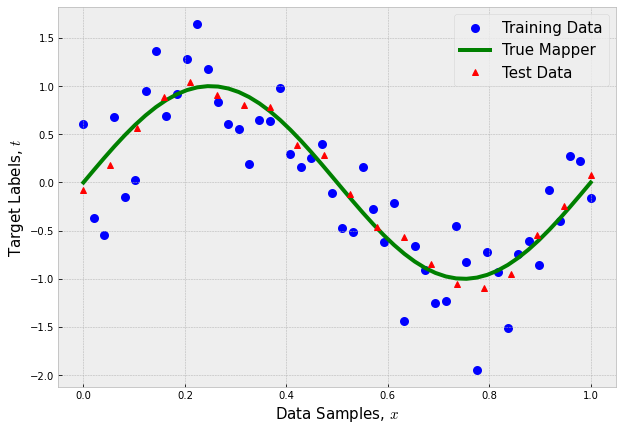

In [17]:
# Generate input samples and desired values
N_train = 50 # number of data samples for training
N_test = 20 # number of data samples for test

a, b = [0,1] # data samples interval

sigma_train = 0.4 # standard deviation of the zero-mean Gaussian noise -- training data
sigma_test = 0.1 # standard deviation of the zero-mean Gaussian noise -- test data

x_train, t_train = NoisySinusoidalData(N_train, a, b, sigma_train) # Training Data - Noisy sinusoidal
x_true, t_true = NoisySinusoidalData(N_train, a, b, 0) # True Sinusoidal - in practice, we don't have the true function
x_test, t_test = NoisySinusoidalData(N_test, a, b, sigma_test) # Test Data - Noisy sinusoidal

# Plotting
plt.figure(figsize=(10,7))
plt.scatter(x_train, t_train, c='b', linewidths=3, label = 'Training Data')
plt.plot(x_true, t_true, 'g', linewidth=4, label = 'True Mapper')
plt.plot(x_test, t_test, 'r^', label = 'Test Data')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, $x$',size=15)
plt.ylabel('Target Labels, $t$',size=15);

## Question 2 Answer 1

In [18]:
def PolynomialRegression_reg(x,t,M,lam):
   
    # Compute feature matrix X with polynomial features
    mu = [0.1,0.3,0.6,0.9]
    sigma = 0.1
    l =  len(x)
    X = np.zeros((l,5))
    X[:,0] = 1
    X[:,1:] = np.array([np.exp(-((x-mu[m-1])**2)/(2*(sigma**2))) for m in range (1,M+1)]).T
   
    # Compute the solution for the parameters w
    w = np.linalg.inv(X.T@X + lam*np.eye(M+1))@X.T@t
   
    # Compute model prediction
    y = X@w
    
    return w, y

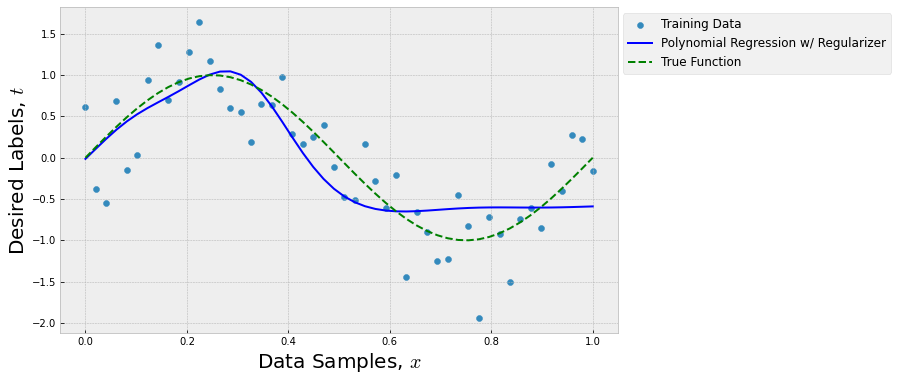

In [19]:
M = 4
lam = 0.001

#w, y, = PolynomialRegression(x_train,t_train,M) 
wreg, yreg = PolynomialRegression_reg(x_train,t_train,M,lam) 

fig=plt.figure(figsize=(10,6))
plt.scatter(x_train,t_train, label='Training Data')
plt.plot(x_train,yreg, 'b',label = 'Polynomial Regression w/ Regularizer')
plt.plot(x_true,t_true,'--g', label = 'True Function')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Data Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);

## Question 2 Answer 2

In [20]:
def PolynomialRegression_test(x,M,w):
    
    # Feature matrix for test set
    #X = np.array([x**m for m in range(M+1)]).T
    mu = [0.1,0.3,0.6,0.9]
    sigma = 0.1
    l =  len(x)
    X = np.zeros((l,5))
    X[:,0] = 1
    X[:,1:] = np.array([np.exp(-((x-mu[m-1])**2)/(2*(sigma**2))) for m in range (1,M+1)]).T
    
    # Prediction for test set
    y = X@w
    
    return y

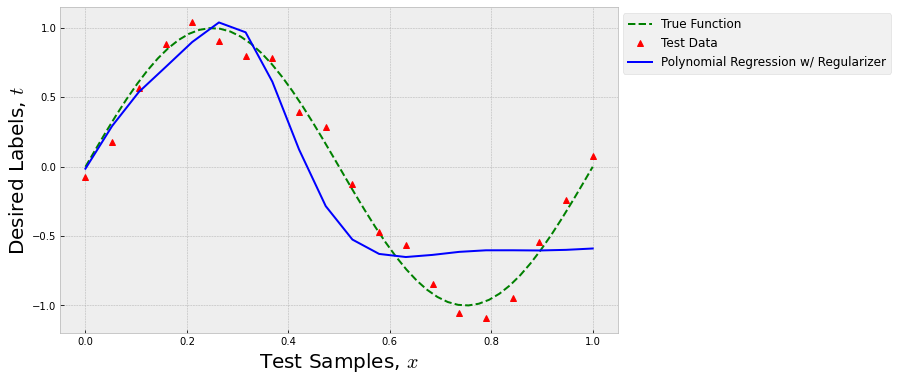

In [21]:
# Prediction for test set using regularized model
y_test_reg = PolynomialRegression_test(x_test, M, wreg)

# Plotting
fig=plt.figure(figsize=(10,6))
plt.plot(x_true, t_true, '--g', label = 'True Function')
plt.plot(x_test, t_test, 'r^', label = 'Test Data')
plt.plot(x_test,y_test_reg, 'b',label = 'Polynomial Regression w/ Regularizer')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Test Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);

## Question 2 Answer 3

Question : Provide a paragraph discussion about how you would determine how                many Gaussian basis functions you would need and how would you      determine the mean values  𝜇𝑗  and the bandwidth parameter  𝜎 ?

Amswer : For solving this problem we can take the methode of cross validation into consideration where, one can consider the number of Gaussian basis function(also model order in this case), mean values  𝜇𝑗 and the bandwidth parameter 𝜎 as hyperparameters. We can assign this hyperparameters some values in a range, then try them all with respect to each other and then take the best posssible pair of all from them cross validation.
Some methods of cross validation are K_fold cross-validation, Holdout method, Leave-one-out cross validation and Leave-p-out cross validation.

___

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.

___